In [ ]:
# py
import os 
import pandas as pd
from matplotlib import pyplot as plt

# Single subject ICA


## labeling
### Manual labeling

In [ ]:
def show_png(png,figsize=(10,12)):
    plt.figure(figsize=figsize)
    im = plt.imread(png)
    plt.imshow(im)
    plt.show()
show_png('ica_label.png', figsize=(20,15))

In [ ]:
# bash
for sub in sub-c* ; do 
fsleyes --scene melodic -ad $sub/*.ica 
done

### automatic labeling

# regress out the noise

In [ ]:
# bash
for sub in sub*; do 
noise_list=`tail -1 ${sub}/labels.txt` 
fsl_regfilt -i $sub/*.ica/filtered_func_data.nii.gz \
            -d $sub/*.ica/melodic_mix \
            -o $sub/*.ica/filtered_func_data_clean.nii.gz \
            -f "${noise_list:1:-1}"  \
done

# warp into standard space

In [37]:
#!/bin/sh
for j in sub* ; do 
    echo $j
applywarp -r ${j}/reg/standard.nii.gz \
              -i ${j}/${j}.ica/filtered_func_data_clean.nii.gz \
              -o ${j}/${j}.ica/filtered_func_data_clean_standard.nii.gz \
              --premat=${j}/reg/example_func2highres.mat \
              -w ${j}/reg/highres2standard_warp.nii.gz  
done 


sub-c01
sub-c02
sub-c03
sub-c04
sub-c05
sub-c06
sub-c07
sub-c09
sub-c10
sub-c11
sub-c12
sub-c13
sub-c14
sub-c16
sub-c17
sub-c18
sub-c19
sub-p14
sub-p15
sub-p16
sub-p18
sub-p19
sub-p21
sub-p22
sub-p23
sub-p24


# Group ICA
## create group ICA map

In [ ]:
# bash
# list the input files
ls -1 */*.ica/filtered_func_data_clean_standard.nii.gz >> input_files.txt

In [ ]:
# bash
# create contrast design
Glm

In [ ]:
# bash
# 15d 

melodic -i input_files.txt -o groupICA15 --tr=2 --nobet --bgthreshold=1 -a concat \
--bgimage=$FSLDIR/data/standard/MNI152_T1_2mm_brain.nii.gz -m $FSLDIR/data/standard/MNI152_T1_2mm_brain_mask.nii.gz --report --Oall -d 15

In [ ]:

# bash
# check group ICA data
fsleyes -std \
  groupICA15/melodic_IC.nii.gz -un -dr 30 100 -n 25 \
  -cm red-yellow -nc blue-lightblue \

## Dual regression

In [1]:
# bash
# Dual regression:

dual_regression groupICA15/melodic_IC 1 design/design.mat design/design.con 5000 groupICA15.dr `cat input_files.txt`


creating common mask
doing the dual regressions
sorting maps and running randomise
creating common mask
doing the dual regressions
sorting maps and running randomise



In [5]:
fsleyes -std groupICA15/melodic_IC -un -cm red-yellow -nc blue-lightblue -dr 4 15 \
groupICA15.dr/dr_stage3_ic0000_tfce_corrp_tstat3.nii.gz -cm green -dr 0.95 1  \
groupICA15.dr/dr_stage3_ic0000_tfce_corrp_tstat4.nii.gz -cm green -dr 0.95 1 

# FSLnet

In [ ]:
# Dual regression:

dual_regression groupICA100/melodic_IC 1 -1 0 groupICA100.dr `cat input_files.txt`

In [ ]:
# Create slice images for FSLnets:

slices_summary groupICA100/melodic_IC 4 $FSLDIR/data/standard/MNI152_T1_2mm groupICA100.sum

In [ ]:
% run in matlab kernel
group_maps='groupICA100/melodic_IC';    
ts_dir='groupICA100.dr';                       


ts=nets_load(ts_dir,3,1);
   
ts_spectra=nets_spectra(ts);   % have a look at mean timeseries spectra



ts.DD=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,58,59,60,61,62,66,67,68,71,72,73,74,75,77,78,79,83,88,90,93,95,96,97,99];  % list the good nodes in your group-ICA output (counting starts at 1, not 0)  
ts=nets_tsclean(ts,1);                   

ts_spectra=nets_spectra(ts);             % have a look at mean spectra after this cleanup



netmats1=  nets_netmats(ts,1,'corr');       % full correlation (normalised covariances)
netmats5=  nets_netmats(ts,1,'ridgep');     % Ridge Regression partial, with rho=0.1


[Znet1,Mnet1]=nets_groupmean(netmats1,1);   
[Znet5,Mnet5]=nets_groupmean(netmats5,1);   

nets_hierarchy(Znet1,Znet5,ts.DD,group_maps); 

%%% view interactive netmat web-based display
nets_netweb(Znet1,Znet5,ts.DD,group_maps,'netweb');


[p_uncorrected,p_corrected]=nets_glm(netmats1,'design.mat','design.con',1);  % returns matrices of 1-p
%netmats=netmats3;  [grotH,grotP,grotCI,grotSTATS]=ttest(netmats);  netmats(:,abs(grotSTATS.tstat)<8)=0;

%%% view 6 most significant edges from this GLM
nets_edgepics(ts,group_maps,Znet1,reshape(p_corrected(1,:),ts.Nnodes,ts.Nnodes),6);

维度太多，重复的节点太多

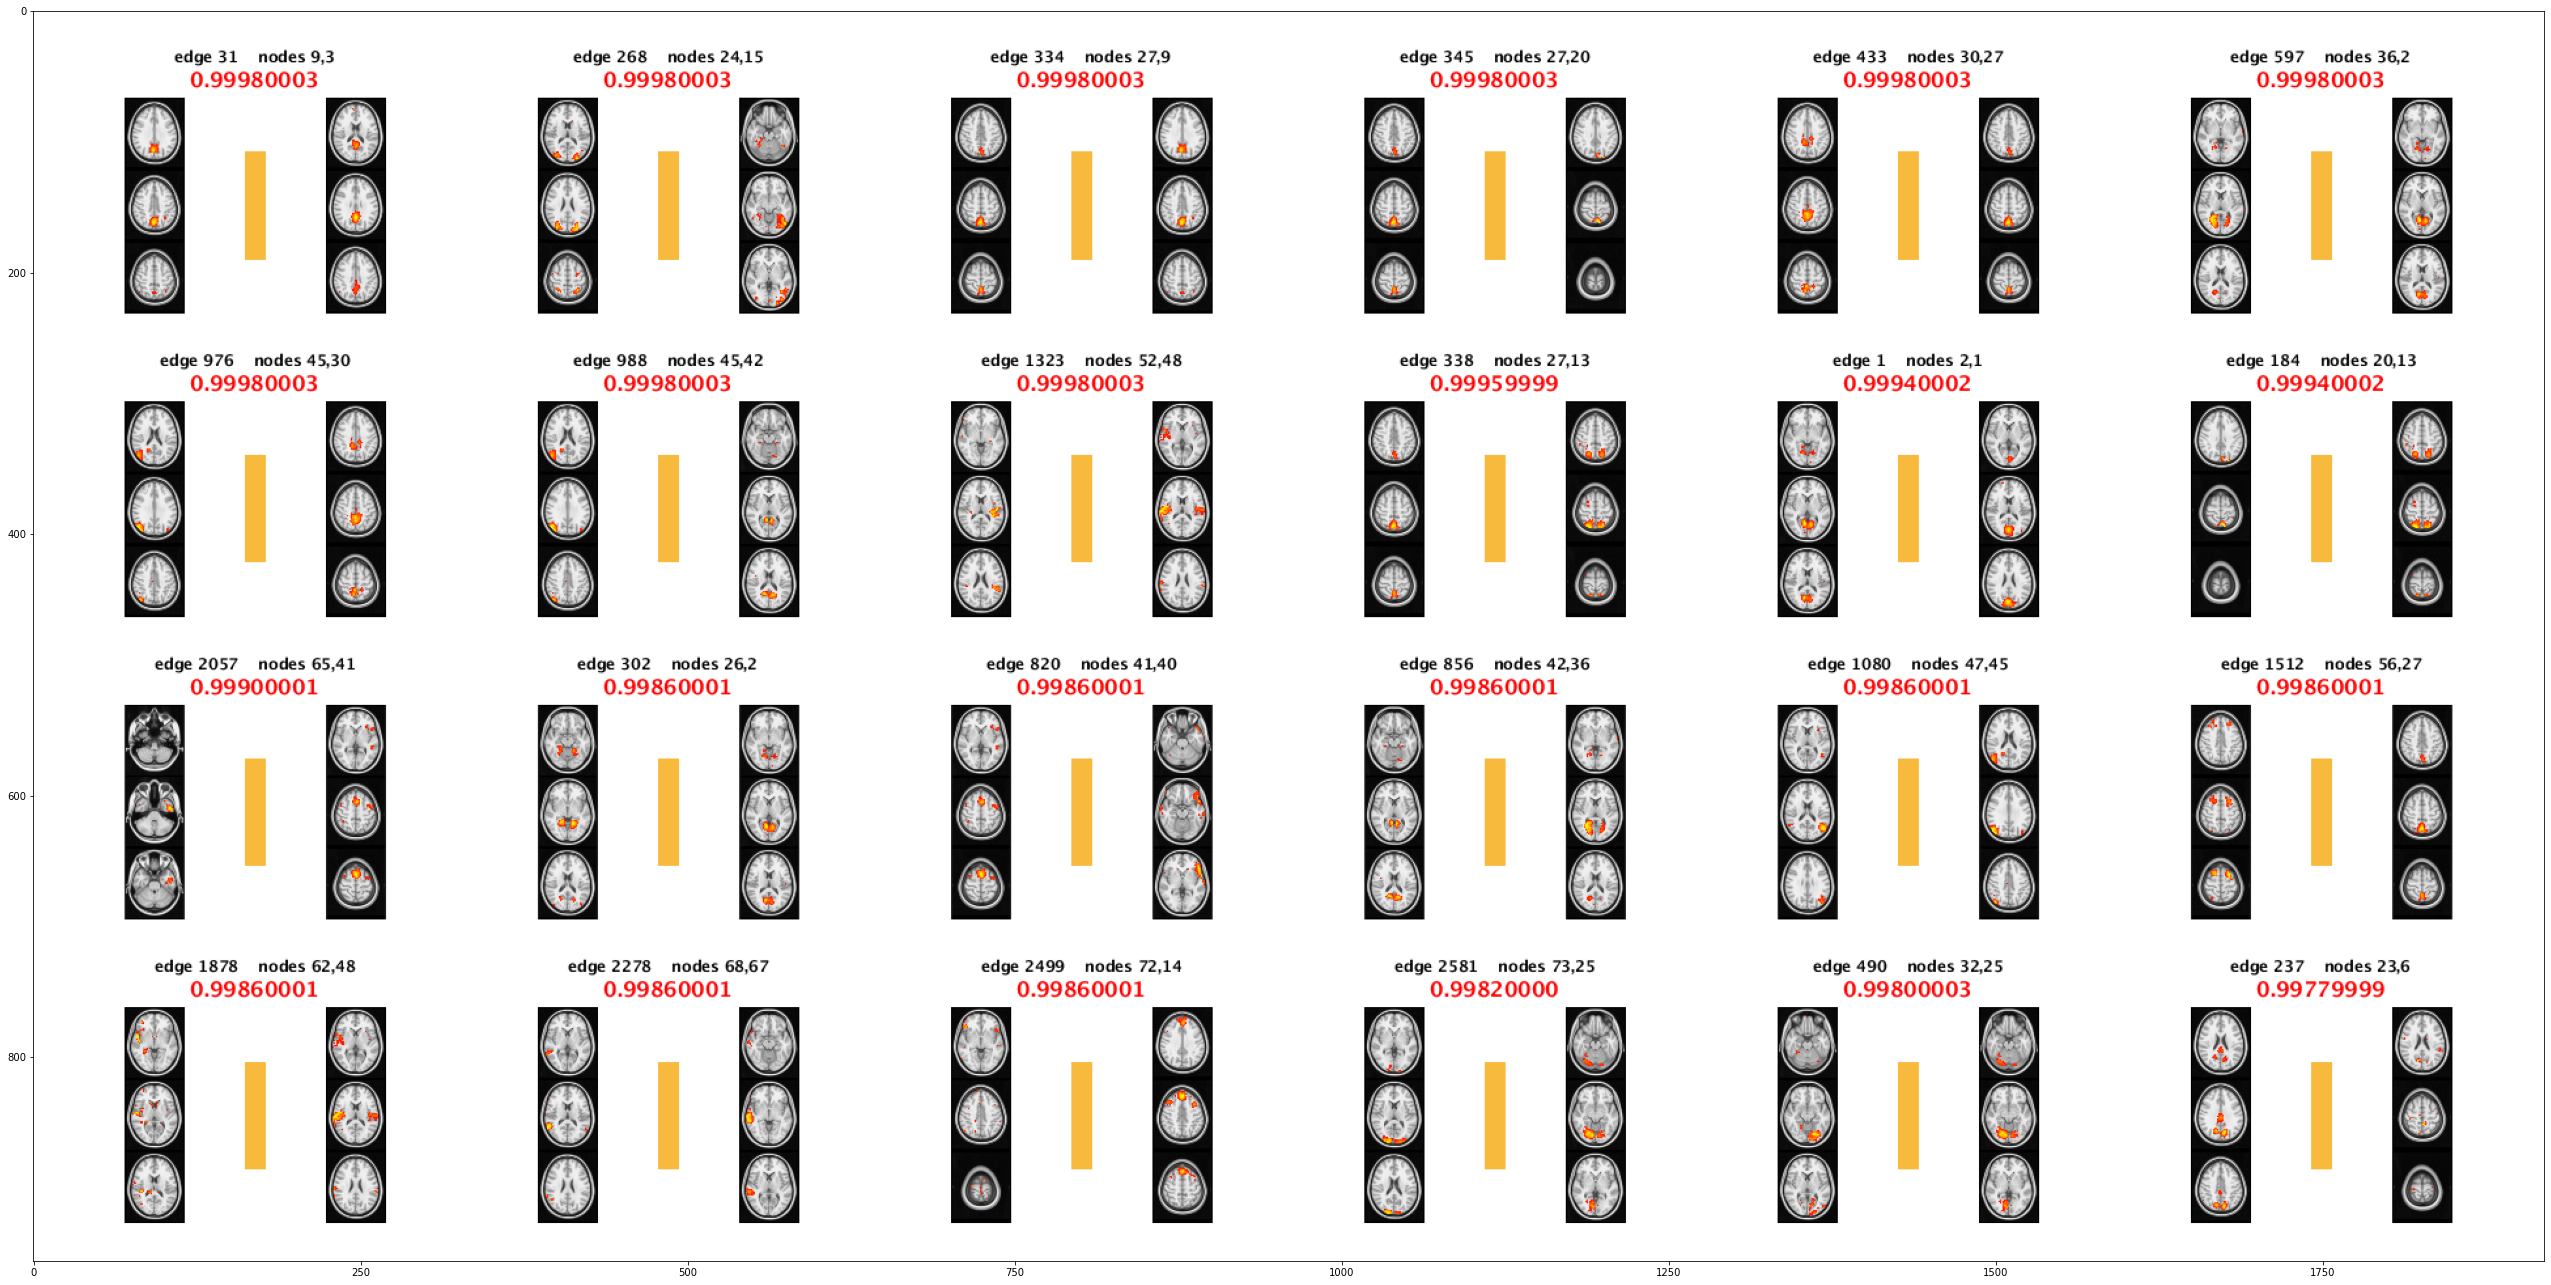

In [7]:
plt.figure(figsize=(45, 60))
im = plt.imread('edges24.png')
plt.imshow(im)